

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

In [113]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))
print("Sample picture size is : {}x{}".format(*X_train[0].shape))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.
Sample picture size is : 28x28


### 2. Visualize the First Six Training Images

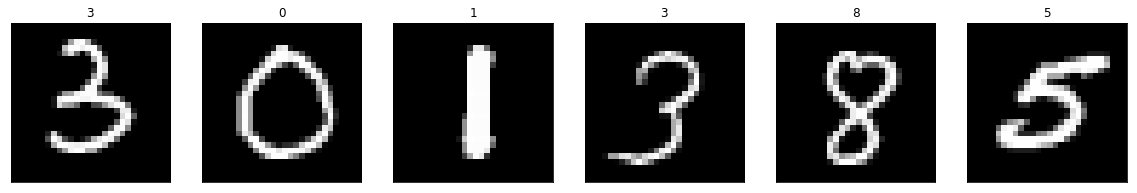

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np
from random import sample

# plot six random training images
randImageIdx = sample(range(1, len(X_train)), 6)
fig = plt.figure(figsize=(20,20))
for i, n in enumerate(randImageIdx):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[n], cmap='gray')
    ax.set_title(str(y_train[n]))

### 3. View an Image in More Detail

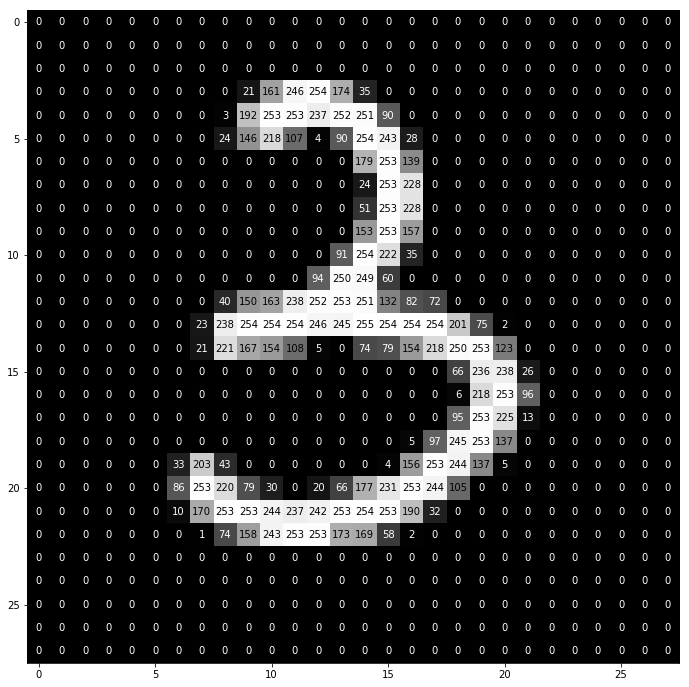

In [116]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[randImageIdx[0]], ax)

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [117]:
# rescale [0,255] --> [0,1]
X_train_original = X_train
X_test_original = X_test

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

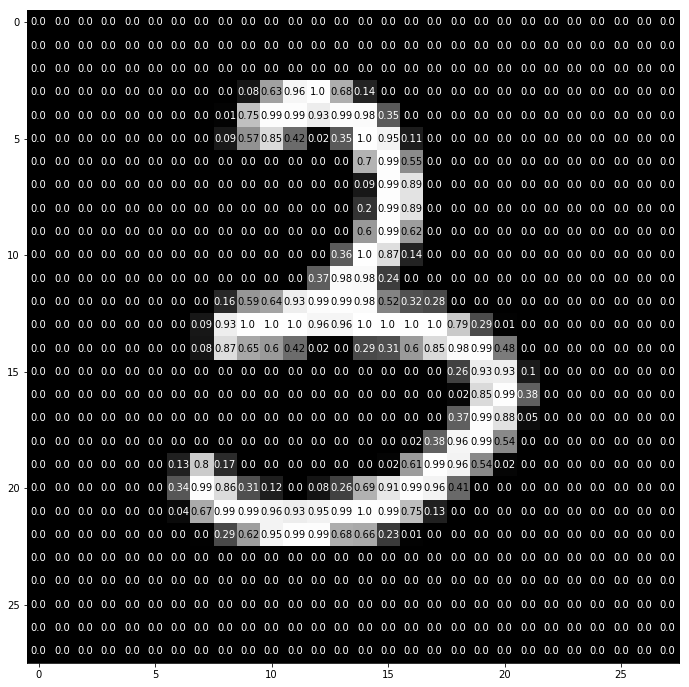

In [120]:
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[randImageIdx[0]], ax)

### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [124]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### 6. Define the Model Architecture

In [91]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### 7. Compile the Model

In [92]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

In [93]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 9.4700%


### 9. Train the Model

In [94]:
from keras.callbacks import ModelCheckpoint   
from time import time

start = time()

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

print("Total training time: {:.2f}s".format(time() - start))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 142us/step - loss: 0.2791 - acc: 0.9136 - val_loss: 0.1132 - val_acc: 0.9659

Epoch 00001: val_loss improved from inf to 0.11321, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 6s 120us/step - loss: 0.1140 - acc: 0.9657 - val_loss: 0.0979 - val_acc: 0.9693

Epoch 00002: val_loss improved from 0.11321 to 0.09791, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 6s 124us/step - loss: 0.0798 - acc: 0.9759 - val_loss: 0.0955 - val_acc: 0.9729

Epoch 00003: val_loss improved from 0.09791 to 0.09553, saving model to mnist.model.best.hdf5
Epoch 4/10
48000/48000 [==============================] - 6s 123us/step - loss: 0.0604 - acc: 0.9817 - val_loss: 0.0842 - val_acc: 0.9775

Epoch 00004: val_loss improved from 0.09553 to 0.08424, saving model to mnist.model.best.hdf5
Epoch 5/10
48000/48000

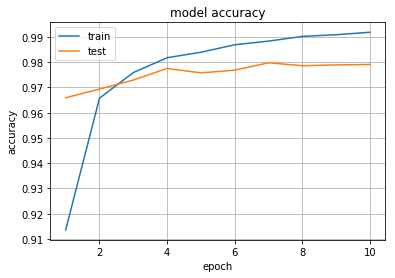

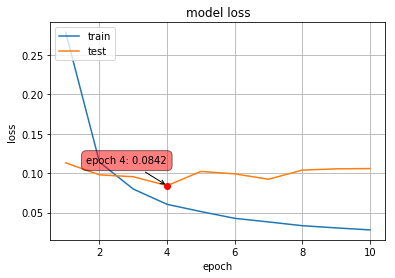

In [97]:
def plotHistory(hist):
    e = [x+1 for x in hist.epoch]
    
    val_loss_history = hist.history['val_loss']
    minValLossVal = min(val_loss_history)
    minValLossIdx = val_loss_history.index(minValLossVal)+1   
    
    # summarize history for accuracy
    plt.plot(e, hist.history['acc'])
    plt.plot(e, hist.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.grid()
    plt.show()
    # summarize history for loss
    plt.plot(e, hist.history['loss'])
    plt.plot(e, hist.history['val_loss'])
    plt.plot(minValLossIdx, minValLossVal, 'or')
    plt.annotate(
        "epoch {}: {:.4f}".format(minValLossIdx, minValLossVal),
        xy=(minValLossIdx, minValLossVal), xytext=(0, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='red', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.grid()
    plt.show()
    
plotHistory(hist)

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [98]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

In [99]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
ref_accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % ref_accuracy)

Test accuracy: 97.8200%


### 12. Experiments...

- Increase (or decrease) the number of nodes in each hidden layers. Do you notice evidence of overfitting (or underfitting)?

**conclusion :** 

- with twice more nodes (1024) in the hidden layers : slightly more overfitting, +150% training time, -0.8% test accuracy
- with half nodes (256) in the hidden layers : equivalent fitting, -50% training time, +0.3% equivalent test accuracy

Increase the number of nodes i each hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dropout_22 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_23 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
________________

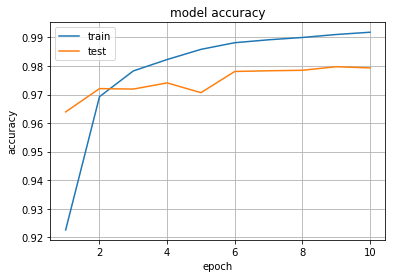

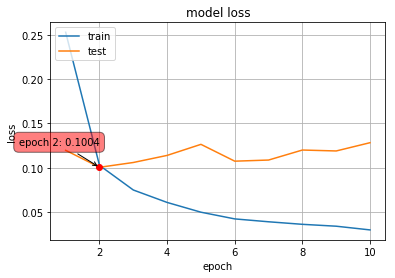

Test accuracy: 97.1000%
accuracy difference to reference model: -0.7200%


In [111]:
experiment = "Increase the number of nodes in each hidden layers"
print(experiment)

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=0, save_best_only=True)

print("training the model...")
%time hist = model.fit(X_train, y_train, batch_size=128, epochs=10,validation_split=0.2, callbacks=[checkpointer],verbose=0, shuffle=True)

plotHistory(hist)

model.load_weights('mnist.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)
print('accuracy difference to reference model: {:.4f}%'.format(accuracy - ref_accuracy))

Decrease the number of nodes in each hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_25 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
___________________

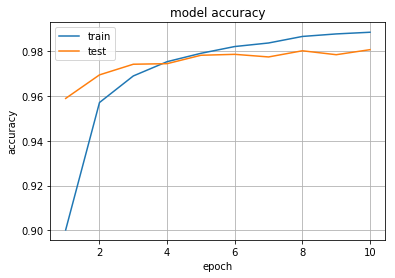

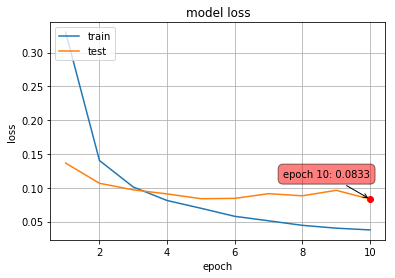

Test accuracy: 98.1200%
accuracy difference to reference model: 0.3000%


In [112]:
experiment = "Decrease the number of nodes in each hidden layers"
print(experiment)

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=0, save_best_only=True)

print("training the model...")
%time hist = model.fit(X_train, y_train, batch_size=128, epochs=10,validation_split=0.2, callbacks=[checkpointer],verbose=0, shuffle=True)

plotHistory(hist)

model.load_weights('mnist.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)
print('accuracy difference to reference model: {:.4f}%'.format(accuracy - ref_accuracy))

- Increase (or decrease) the number of hidden layers. Do you notice evidence of overfitting (or underfitting)?

**conclusion :**
- with only 1 hidden layer: equivalent fitting, -50% training time, equivalent test accuracy
- with 3 hidden layers: slighlty more overfitting, +50% training time, +0.17% in test accuracy

Decrease CNN architecture to 1 hidden layer only
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
training the model...
CPU times: user 1min 29s, sys: 9.28 s, total: 1min 38s
Wall time: 34.9 s


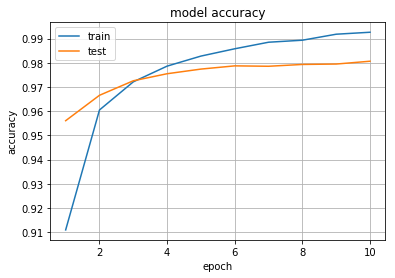

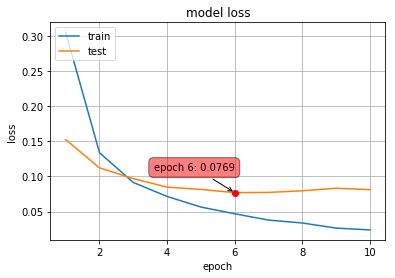

Test accuracy: 97.8800%
accuracy difference to reference model: 0.0600%


In [107]:
experiment = "Decrease CNN architecture to 1 hidden layer only"
print(experiment)

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=0, save_best_only=True)

print("training the model...")
%time hist = model.fit(X_train, y_train, batch_size=128, epochs=10,validation_split=0.2, callbacks=[checkpointer],verbose=0, shuffle=True)

plotHistory(hist)

model.load_weights('mnist.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)
print('accuracy difference to reference model: {:.4f}%'.format(accuracy - ref_accuracy))

Increase CNN architecture to 3 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_19 (Dropout)         (N

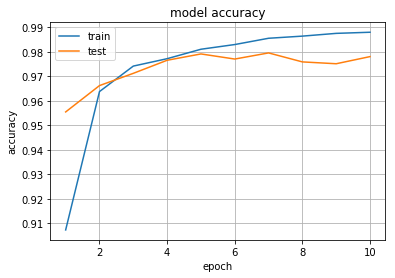

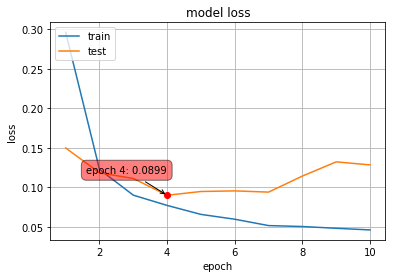

Test accuracy: 97.9900%
accuracy difference to reference model: 0.1700%


In [108]:
experiment = "Increase CNN architecture to 3 hidden layers"
print(experiment)

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=0, save_best_only=True)

print("training the model...")
%time hist = model.fit(X_train, y_train, batch_size=128, epochs=10,validation_split=0.2, callbacks=[checkpointer],verbose=0, shuffle=True)

plotHistory(hist)

model.load_weights('mnist.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)
print('accuracy difference to reference model: {:.4f}%'.format(accuracy - ref_accuracy))

- Remove the dropout layers in the network. Do you notice evidence of overfitting?

** conclusion :**

significant overfitting, equivalent training time, +0.19% in test accuracy

Remove the dropout layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_35 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_36 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
training the model...
CPU times: user 2min 20s, sys: 14.3 s, total: 2min 34s
Wall time: 54 s


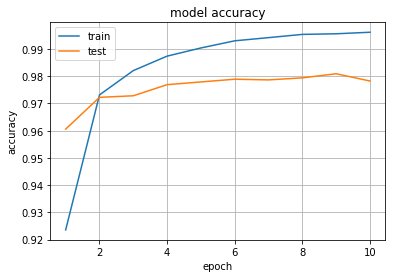

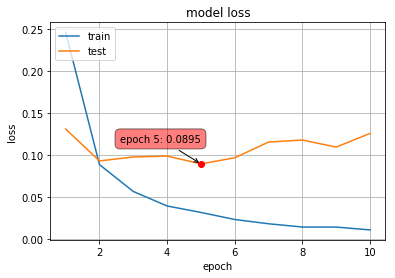

Test accuracy: 98.0100%
accuracy difference to reference model: 0.1900%


In [109]:
experiment = "Remove the dropout layers"
print(experiment)

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=0, save_best_only=True)

print("training the model...")
%time hist = model.fit(X_train, y_train, batch_size=128, epochs=10,validation_split=0.2, callbacks=[checkpointer],verbose=0, shuffle=True)

plotHistory(hist)

model.load_weights('mnist.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)
print('accuracy difference to reference model: {:.4f}%'.format(accuracy - ref_accuracy))

- Remove the ReLU activation functions. Does the accuracy decrease?

**conclsuion :**
anarchic learning, equivalent training time, -5.9% test accuracy

Remove the reLU activation functions
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________

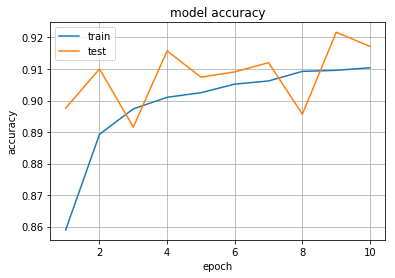

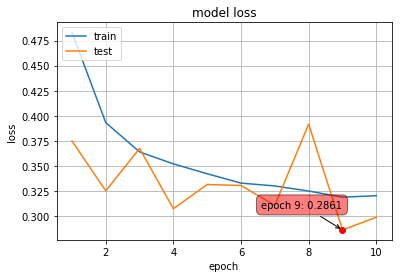

Test accuracy: 91.9500%
accuracy difference to reference model: -5.8700%


In [110]:
experiment = "Remove the reLU activation functions"
print(experiment)

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=0, save_best_only=True)

print("training the model...")
%time hist = model.fit(X_train, y_train, batch_size=128, epochs=10,validation_split=0.2, callbacks=[checkpointer],verbose=0, shuffle=True)

plotHistory(hist)

model.load_weights('mnist.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)
print('accuracy difference to reference model: {:.4f}%'.format(accuracy - ref_accuracy))

- Remove the image pre-processing step with dividing every pixel by 255. Does the accuracy decrease?

** conclusion :** terrible accuracy, terrible loss, equivalent training time, -61% in test accuracy!

without image pre-processing
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_28 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_29 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________

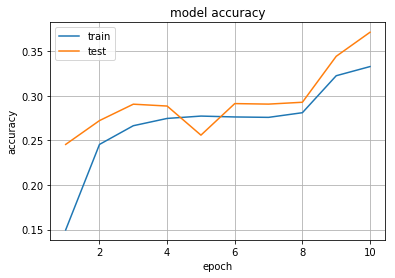

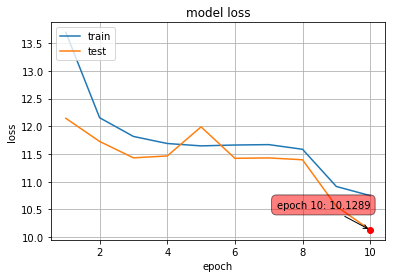

Test accuracy: 36.8100%
accuracy difference to reference model: -61.0100%


In [125]:
experiment = "without image pre-processing"
print(experiment)

model = Sequential()
model.add(Flatten(input_shape=X_train_original.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=0, save_best_only=True)

print("training the model...")
%time hist = model.fit(X_train_original, y_train, batch_size=128, epochs=10,validation_split=0.2, callbacks=[checkpointer],verbose=0, shuffle=True)

plotHistory(hist)

model.load_weights('mnist.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(X_test_original, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)
print('accuracy difference to reference model: {:.4f}%'.format(accuracy - ref_accuracy))

- Try a different optimizer, such as stochastic gradient descent.

** conclusion :** acceptable fitting but less performant as refernece on 10 epochs, -20% training time, -4.6% on test accuracy. Probably need more epochs (=more training time) to reach reference test accuracy level.

with stochastic gradient descent (SGD) optimizer
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_32 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_33 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_____________________

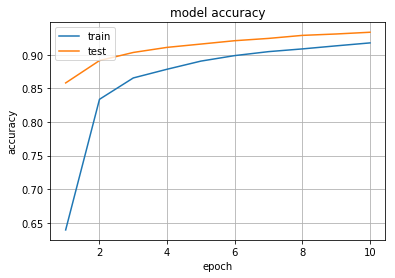

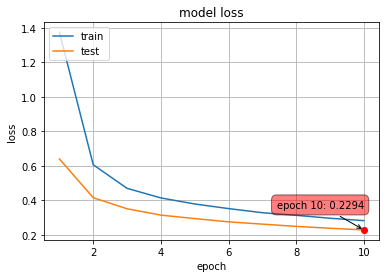

Test accuracy: 93.2200%
accuracy difference to reference model: -4.6000%


In [127]:
experiment = "with stochastic gradient descent (SGD) optimizer"
print(experiment)

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='SGD', 
              metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=0, save_best_only=True)

print("training the model...")
%time hist = model.fit(X_train, y_train, batch_size=128, epochs=10,validation_split=0.2, callbacks=[checkpointer],verbose=0, shuffle=True)

plotHistory(hist)

model.load_weights('mnist.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)
print('accuracy difference to reference model: {:.4f}%'.format(accuracy - ref_accuracy))

- Increase (or decrease) the batch size.

** conclusion :** 

- with double batche size (256): equivalent fitting, -20% training time, +0.43% on test accuracy 
- with half batch size (64): significant overfitting, +50% training time, -0.19% on test accuracy

with double batch size
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_34 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_35 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_______________________________________________

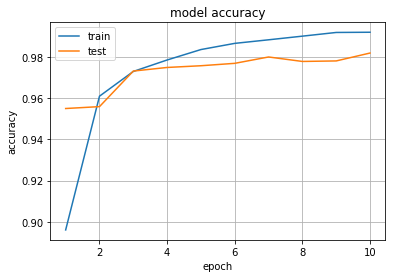

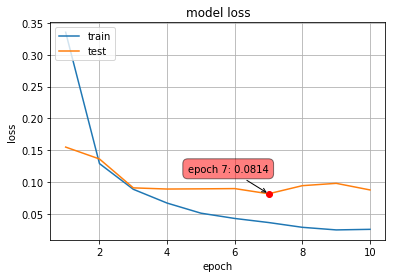

Test accuracy: 98.2500%
accuracy difference to reference model: 0.4300%


In [128]:
experiment = "with double batch size"
print(experiment)

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=0, save_best_only=True)

print("training the model...")
%time hist = model.fit(X_train, y_train, batch_size=256, epochs=10,validation_split=0.2, callbacks=[checkpointer],verbose=0, shuffle=True)

plotHistory(hist)

model.load_weights('mnist.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)
print('accuracy difference to reference model: {:.4f}%'.format(accuracy - ref_accuracy))

with half batch size
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_36 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_37 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________

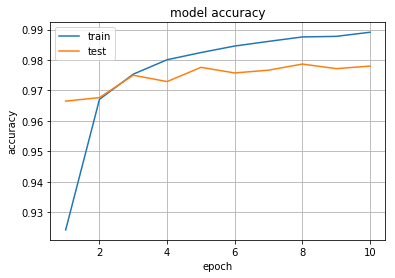

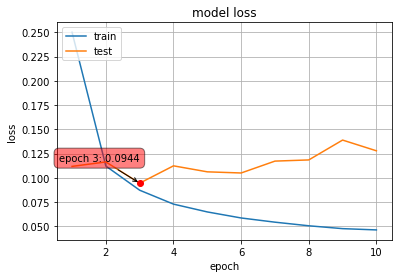

Test accuracy: 97.6300%
accuracy difference to reference model: -0.1900%


In [129]:
experiment = "with half batch size"
print(experiment)

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=0, save_best_only=True)

print("training the model...")
%time hist = model.fit(X_train, y_train, batch_size=64, epochs=10,validation_split=0.2, callbacks=[checkpointer],verbose=0, shuffle=True)

plotHistory(hist)

model.load_weights('mnist.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)
print('accuracy difference to reference model: {:.4f}%'.format(accuracy - ref_accuracy))

## Conclusion of the experiments

- half the amount of node is sufficient in the hidden layers
- 2 hidden layers are fine, 1 could suffice
- use dropout, relu activation, rmsprop, image pre-processing
- make bigger batchs

Ze best
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_25 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_40 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
training the model...
CPU times: user 38.2 s, sys: 1.88 s, total: 40.1 s
Wall time: 15.1 s


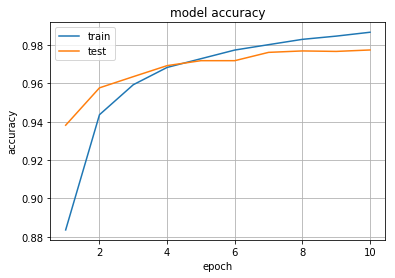

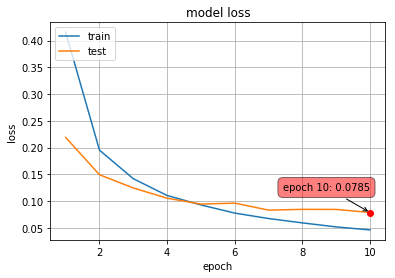

Test accuracy: 97.9900%
accuracy difference to reference model: 0.1700%


In [131]:
experiment = "Ze best"
print(experiment)

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=0, save_best_only=True)

print("training the model...")
%time hist = model.fit(X_train, y_train, batch_size=256, epochs=10,validation_split=0.2, callbacks=[checkpointer],verbose=0, shuffle=True)

plotHistory(hist)

model.load_weights('mnist.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)
print('accuracy difference to reference model: {:.4f}%'.format(accuracy - ref_accuracy))